# Analysis of Structural Properties

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from collections import Counter

%matplotlib inline

## Node degree, network average degree, degree distribution

In [4]:
# input edgelist from file
G = nx.read_edgelist("datafiles/social/facebook/fb.txt")

In [6]:
degrees = [deg for node, deg in nx.degree(G)]

In [8]:
# kmin - minimum degree
kmin = np.min(degrees)
print('minimum degree {}'.format(kmin))
# kmax - maximum degree
kmax = np.max(degrees)
print('maximum degree {}'.format(kmax))
# kavg - average degree of the network
kavg = np.mean(degrees)
print('average degree {}'.format(kavg))

minimum degree 1
maximum degree 1098
average degree 25.640112347209364


**Degree distribution**: helps us understand connectivity trends in networks and how edges are distributed among nodes (does everyone have similar number of connections, or do we have hubs, nodes with significantly higher number of connections?)

In [9]:
def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

In [12]:
x,y=np.transpose(degree_distr(G))

Text(0, 0.5, 'P(k)')

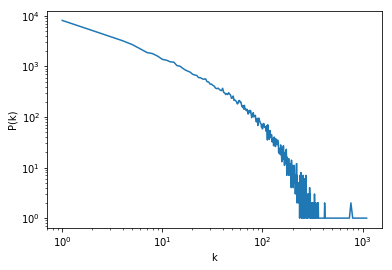

In [15]:
plt.loglog(x,y)
plt.xlabel(r'k')
plt.ylabel(r'P(k)')

## Paths on Networks: average path length, shortest path, longest path

In [18]:
G=nx.Graph()
# assign weight to edge
G.add_edge('Mary','Steven', weight=5)

In [19]:
# average path length in graph
nx.average_shortest_path_length(G, weight=None)

1.0

## Clustering coefficient, triangles

In [26]:
G = nx.read_edgelist("datafiles/social/facebook/fb.txt")

In [29]:
# triangles
nx.triangles(G)

In [30]:
g=nx.complete_graph(100)

In [32]:
nx.clustering(g, 10)

1.0

In [28]:
# clustering coefficient of a node
nx.clustering(G, '10')

0.6666666666666666

In [34]:
# clustering coefficient of all nodes (returns a dictionary)
# nx.clustering(G)

In [35]:
# clustering coefficient of the network
cc = nx.clustering(G)
avg_clust = sum(cc.values()) / len(cc)
print(avg_clust)

0.22098240472748912


## Centrality measures

In [44]:
G=nx.Graph()
# assign weight to edge
G.add_edge('Mary','Steven', weight=5)
G.add_edge('Mary','Adam', weight=1)
G.add_edge('Luiz','Adam', weight=1)
G.add_edge('Luiz','Mary', weight=1)

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


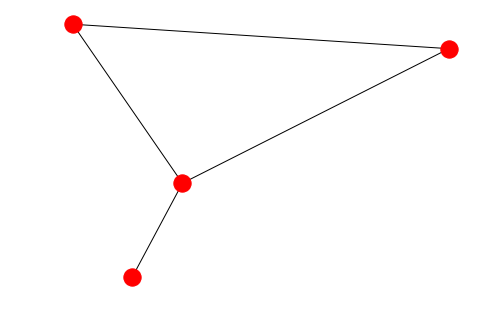

In [45]:
nx.draw(G)

In [46]:
nx.degree(G)

DegreeView({'Mary': 3, 'Steven': 1, 'Adam': 2, 'Luiz': 2})

In [47]:
# degree centrality
nx.degree_centrality(G)

{'Mary': 1.0,
 'Steven': 0.3333333333333333,
 'Adam': 0.6666666666666666,
 'Luiz': 0.6666666666666666}

In [48]:
# betweenness centrality of network
nx.betweenness_centrality(G)

{'Mary': 0.6666666666666666, 'Steven': 0.0, 'Adam': 0.0, 'Luiz': 0.0}

In [51]:
# closeness centrality of network
nx.closeness_centrality(G)

{'Mary': 1.0, 'Steven': 0.6, 'Adam': 0.75, 'Luiz': 0.75}

In [52]:
# eigenvector centrality of network
nx.eigenvector_centrality(G)

{'Mary': 0.6116286437343043,
 'Steven': 0.2818457979386572,
 'Adam': 0.5227204550943348,
 'Luiz': 0.5227204550943348}

## Components

In [30]:
# checks whether the network is connected
nx.is_connected(G)

True

In [53]:
# find number of connected components
nx.number_connected_components(G)

1

In [54]:
# get the nodes in the same component as *n*
nx.node_connected_component(G, 'Mary')

{'Adam', 'Luiz', 'Mary', 'Steven'}

## 6. Assortativity

* Pearson correlation coefficient [-1; 1]
* social networks are highly assortative (homophily): high degree nodes connect to other high degree nodes
* technological are disassortative: high degree nodes connect to low degree nodes

Assortativity computed based on:
* degree

In [55]:
# Barabasi-Albert (scale-free) network 
ba = nx.barabasi_albert_graph(50, 3)

In [56]:
nx.degree_assortativity_coefficient(ba)

-0.1700403137475433